This tutorial will give an example of how to use Riroriro to calculate horizon distances and detectability percentages for a given merger.

In [1]:
import numpy as np

We import the data of a synthetic gravitational waveform generated using the gravitational wave functions of Riroriro (demonstrated in the tutorial example_GW), and the FINDCHIRP trace data for the corresponding waveform. The example waveform is included in this repository, but the FINDCHIRP data files are not included in Github for file size reasons and can instead be found at this link: https://drive.google.com/drive/folders/12TYxYKtBL1iuFHG_ySFhS12Aqv4JHGOr

You can use any Riroriro gravitational waveform in the format output by waveform_exporter for inputarray (if you choose a system different than the default, remember to also select the corresponding FINDCHIRP trace). We use the data for a binary black hole merger with log(Mc/Msun) = 1.4 and mass ratio q = 0.8.

In [2]:
inputarray = np.genfromtxt('example_1.4_0.8.dat')
findchirp_array = np.genfromtxt('findchirp_traces/mergerwave_1.40000_0.800000.dat')

We import noise spectra from three detectors; these are not included in this repository for copyright reasons but were sourced from https://dcc.ligo.org/LIGO-T1500293/public

You can also use different noise spectra files, as long as they have the frequency values in the first column and ASD noise levels in the second.

In [3]:
noise_l = np.genfromtxt('noise_spectra/o3_l1.txt') #LIGO Livingston
noise_h = np.genfromtxt('noise_spectra/o3_h1.txt') #LIGO Hanford
noise_v = np.genfromtxt('noise_spectra/o3_v1.txt') #Virgo

noisearray_list = [noise_l,noise_h,noise_v]

In [4]:
import riroriro.horizondistfuns as hor

We calculate the optimal-alignment horizon distances for two cases: with all three detectors operating in quadrature and with a nonspecific single detector operating.

In [5]:
quad_dist = hor.horizon_distance_calculation(inputarray,findchirp_array,noisearray_list,'quad')
mean_dist = hor.horizon_distance_calculation(inputarray,findchirp_array,noisearray_list,'mean')

print("The quadrature horizon distance is %.1f Mpc.\n"
     "The mean-of-individual horizon distance is %.1f Mpc." % (quad_dist,mean_dist))

The quadrature horizon distance is 2876.5 Mpc.
The mean-of-individual horizon distance is 1817.4 Mpc.


In [6]:
import riroriro.detectabilityfuns as det

We generate a function that encodes the impact of an arbitrary alignment of source and detector upon the SNR of the signal, compared to the optimal-alignment SNR. This function does not depend on the system itself, and so only needs to be generated once even when evaluating multiple mergers.

In [7]:
Theta_CDF, min_CDF, max_CDF = det.cdf_generator()

To show how the detectability (the probability that its SNR would be above the threshold of 8 given a random alignment) relates to the optimal-alignment SNR, we calculate the detectability over a range of optimal-alignment SNR values and illustrate the relationship with a plot. (This plot does not depend on the example system in any way.)

In [24]:
sample_snrs = range(100)
sample_dets = np.empty((len(sample_snrs))) 

for i in range(len(sample_dets)):
    sample_dets[i] = det.detectability_calculator(Theta_CDF,min_CDF,max_CDF,float(sample_snrs[i]))

Text(0, 0.5, 'Detectability')

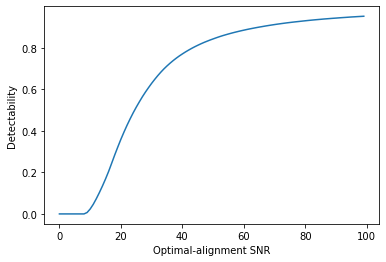

In [25]:
import matplotlib.pyplot as plt

plt.plot(sample_snrs,sample_dets)
plt.xlabel('Optimal-alignment SNR')
plt.ylabel('Detectability')